In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import measure
import seaborn as sns

from eda import git_root

In [2]:
ROOT = git_root(absolute=True)

with open("config/config.yaml", mode="r") as f:
    cfg = yaml.safe_load(f)
df = pd.read_csv(ROOT / cfg["data"]["OUTPUT_DIR"] / "pixel_counts.csv", index_col=0)
df

,1,2,4,5,9,10,11,13,14,15,...,18,19,20,22,23,24,25,28,tissue,status
0,1729643.0,7937.0,29355.0,44018.0,10863.0,163742.0,8660.0,16586.0,1007816.0,24667.0,...,18155.0,27185.0,137330.0,478551.0,199730.0,54208.0,17817.0,17880.0,0,non-cancerous
1,180575.0,648814.0,1442959.0,904726.0,564435.0,636641.0,767959.0,313342.0,260586.0,396193.0,...,793957.0,525933.0,34427.0,312101.0,40302.0,396620.0,432547.0,504111.0,0,cancerous
2,1124320.0,6656.0,30052.0,60400.0,15488.0,158668.0,15208.0,5932.0,811956.0,30104.0,...,27184.0,39268.0,143688.0,460912.0,213052.0,53236.0,10156.0,19736.0,1,non-cancerous
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,cancerous
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,non-cancerous
5,183980.0,304020.0,778016.0,565664.0,304300.0,680864.0,264652.0,87640.0,322308.0,262724.0,...,503444.0,372940.0,20800.0,404096.0,28368.0,445304.0,101504.0,281948.0,2,cancerous
6,239965.0,10723.0,24897.0,34526.0,12472.0,23433.0,25186.0,8904.0,133168.0,17718.0,...,28540.0,15722.0,847330.0,107935.0,1044017.0,15119.0,9171.0,10806.0,3,non-cancerous
7,19892.0,310653.0,290643.0,181310.0,178395.0,131441.0,284323.0,535041.0,41229.0,136657.0,...,187182.0,133877.0,16567.0,57568.0,15815.0,117911.0,559052.0,198891.0,3,cancerous
8,104335.0,26050.0,16976.0,27938.0,12789.0,12791.0,25600.0,11863.0,64730.0,25677.0,...,42995.0,15115.0,2015973.0,48482.0,1884738.0,12867.0,13584.0,16715.0,4,non-cancerous
9,2905.0,504540.0,243844.0,131197.0,231869.0,49047.0,486089.0,587344.0,7235.0,157615.0,...,197236.0,129480.0,2284.0,13220.0,2758.0,56730.0,791819.0,241349.0,4,cancerous


In [7]:
groups = df.groupby(["status"])
df_counts_by_status = groups.sum()
df_fraction = df_counts_by_status / df_counts_by_status.sum()
display(df_fraction)

df_fraction.index.name = "Status"
df_fraction = df_fraction.rename({"cancerous":"Cancerous", "non-cancerous":"Noncancerous"})
display(df_fraction)

,1,2,4,5,9,10,11,13,14,15,17,18,19,20,22,23,24,25,28,tissue
status,,,,,,,,,,,,,,,,,,,,
cancerous,0.108029,0.971768,0.964547,0.91441,0.961212,0.806836,0.960241,0.972371,0.238336,0.906629,0.988433,0.935023,0.922756,0.023017,0.417972,0.025444,0.882439,0.973793,0.949562,0.5
non-cancerous,0.891971,0.028232,0.035453,0.08559,0.038788,0.193164,0.039759,0.027629,0.761664,0.093371,0.011567,0.064977,0.077244,0.976983,0.582028,0.974556,0.117561,0.026207,0.050438,0.5


,1,2,4,5,9,10,11,13,14,15,17,18,19,20,22,23,24,25,28,tissue
Status,,,,,,,,,,,,,,,,,,,,
Cancerous,0.108029,0.971768,0.964547,0.91441,0.961212,0.806836,0.960241,0.972371,0.238336,0.906629,0.988433,0.935023,0.922756,0.023017,0.417972,0.025444,0.882439,0.973793,0.949562,0.5
Noncancerous,0.891971,0.028232,0.035453,0.08559,0.038788,0.193164,0.039759,0.027629,0.761664,0.093371,0.011567,0.064977,0.077244,0.976983,0.582028,0.974556,0.117561,0.026207,0.050438,0.5


In [8]:
df_stack = (df_fraction.drop("tissue", axis=1)
            .stack()
            .reset_index()
            .rename({"level_1":"cluster", 0:"fraction"}, axis=1))
df_stack

,Status,cluster,fraction
0,Cancerous,1,0.108029
1,Cancerous,2,0.971768
2,Cancerous,4,0.964547
3,Cancerous,5,0.914410
4,Cancerous,9,0.961212
5,Cancerous,10,0.806836
6,Cancerous,11,0.960241
7,Cancerous,13,0.972371
8,Cancerous,14,0.238336
9,Cancerous,15,0.906629


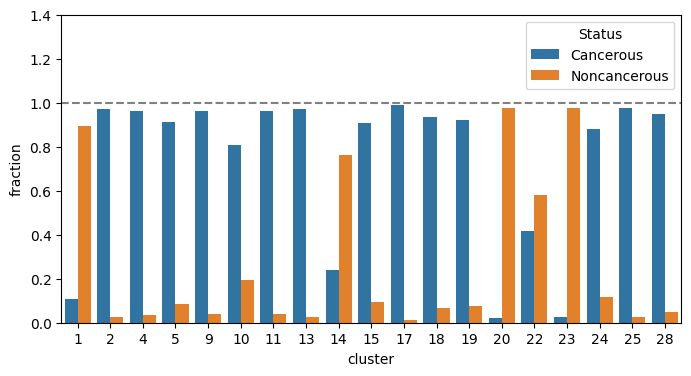

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
order = df_stack["cluster"].unique()
sns.barplot(data=df_stack, x="cluster", y="fraction", order=order, hue="Status", ax=ax)
ax.set_ylim(0, 1.4)
ax.axhline(1, ls="--", c="gray")